In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170499072it [04:41, 604954.88it/s]                                


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


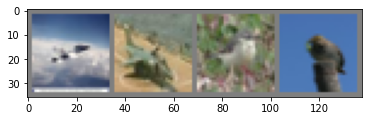

plane plane  bird  bird


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 50, (2,2),stride=2)
        self.pool1 = nn.MaxPool2d((2,2), stride=2)
        self.bn1 = nn.BatchNorm2d(50)
        self.conv2 = nn.Conv2d(50, 150, (2,2),stride=1)
        self.pool2 = nn.MaxPool2d((2,2), stride=1)
        self.bn2 = nn.BatchNorm2d(150)
        self.fc1 = nn.Linear(6 * 6 * 150, 1000)
        self.bn3 = nn.BatchNorm1d(1000)
        self.fc2 = nn.Linear(1000,120)
        self.bn4 = nn.BatchNorm1d(120)
        self.fc3 = nn.Linear(120, 84)
        self.bn5 = nn.BatchNorm1d(84)
        self.fc4 = nn.Linear(84, 10)
        self.bn6 = nn.BatchNorm1d(10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.bn1(self.pool1(torch.tanh(self.conv1(x))))
        x = self.bn2(self.pool2(torch.tanh(self.conv2(x))))
        x = x.view(-1, 6 * 6 * 150)
        x = torch.tanh(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.softmax(x)
        return x

net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001,momentum = 0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (conv1): Conv2d(3, 50, kernel_size=(2, 2), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(50, 150, kernel_size=(2, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=5400, out_features=1000, bias=True)
  (bn3): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1000, out_features=120, bias=True)
  (bn4): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (bn5): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=84, out_features=10, bias=

In [6]:
import matplotlib.pyplot as plt
train_losses = []
validation_losses = []
for epoch in range(50):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    train_losses.append((running_loss*32)/len(trainloader))
    
    running_loss = 0.0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images,labels = images.to(device),labels.to(device)
            outputs = net(images)
            loss = criterion(outputs,labels)
            running_loss += loss.item()
    validation_losses.append((running_loss*32)/len(testloader))

[1,  2000] loss: 2.277
[1,  4000] loss: 2.171
[1,  6000] loss: 2.100
[1,  8000] loss: 2.053
[1, 10000] loss: 2.009
[1, 12000] loss: 1.983
[2,  2000] loss: 1.970
[2,  4000] loss: 1.961
[2,  6000] loss: 1.936
[2,  8000] loss: 1.939
[2, 10000] loss: 1.936
[2, 12000] loss: 1.936
[3,  2000] loss: 1.909
[3,  4000] loss: 1.908
[3,  6000] loss: 1.903
[3,  8000] loss: 1.904
[3, 10000] loss: 1.892
[3, 12000] loss: 1.890
[4,  2000] loss: 1.873
[4,  4000] loss: 1.875
[4,  6000] loss: 1.884
[4,  8000] loss: 1.883
[4, 10000] loss: 1.870
[4, 12000] loss: 1.874
[5,  2000] loss: 1.854
[5,  4000] loss: 1.854
[5,  6000] loss: 1.857
[5,  8000] loss: 1.854
[5, 10000] loss: 1.849
[5, 12000] loss: 1.848
[6,  2000] loss: 1.833
[6,  4000] loss: 1.829
[6,  6000] loss: 1.833
[6,  8000] loss: 1.836
[6, 10000] loss: 1.845
[6, 12000] loss: 1.837
[7,  2000] loss: 1.815
[7,  4000] loss: 1.819
[7,  6000] loss: 1.826
[7,  8000] loss: 1.816
[7, 10000] loss: 1.813
[7, 12000] loss: 1.815
[8,  2000] loss: 1.795
[8,  4000] 

In [ ]:
print('Finished Training')
plt.plot(train_losses,label = 'train')
plt.legend()

In [ ]:
plt.plot(validation_losses,label = 'validation')
plt.legend()

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(100 * correct / total)